In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Dataset/Flight_Price_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


1)Perform Feature Engineering

In [ ]:
df.shape

(10683, 11)

In [ ]:
df.duplicated().sum()

220

In [ ]:
# drop duplicates

df.drop_duplicates(inplace=True)


In [ ]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


In [ ]:
# fill null values

df['Route'].fillna('Other', inplace=True)
df['Total_Stops'].fillna('0', inplace=True)


In [ ]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

1) b.Extract Date, Month, Year from Date of Journey column

In [ ]:
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
df['Journey_year'] = pd.to_datetime(df['Date_of_Journey']).dt.year


<ipython-input-10-9eb473640325>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
<ipython-input-10-9eb473640325>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Journey_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
<ipython-input-10-9eb473640325>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Journey_year'] = pd.to_datetime(df['Date_of_Journey']).dt.year


2)Perform Exploratory Data Analysis (EDA) tasks
a) Which airline is most preferred airline
c) Find the majority of the flights take off from which source
d) Find maximum flights land in which destination

In [ ]:
# a)Which airline is most preferred airline

airline_counts = df['Airline'].value_counts()
most_preferred_airline = airline_counts.index[0]
print(f"The most preferred airline is {most_preferred_airline} with {airline_counts[most_preferred_airline]} flights.")


The most preferred airline is Jet Airways with 3700 flights.


In [ ]:
#b)Find the majority of the flights take off from which source

source_counts = df['Source'].value_counts()
most_preferred_source = source_counts.index[0]
print(f"The majority of the flights take off from {most_preferred_source} with {source_counts[most_preferred_source]} flights.")


The majority of the flights take off from Delhi with 4346 flights.


In [ ]:
# c)Find maximum flights land in which destination

destination_counts = df['Destination'].value_counts()
most_preferred_destination = destination_counts.index[0]
print(f"The majority of the flights land in {most_preferred_destination} with {destination_counts[most_preferred_destination]} flights.")


The majority of the flights land in Cochin with 4346 flights.


3)Compare independent features with Target feature to check the
impact on price
a) Which airline has the highest price
b) Check if the business class flights are high price or low and find
only those flights which price is higher than 50k

In [ ]:
# Which airline has the highest price

highest_price_airline = df.groupby('Airline')['Price'].mean().sort_values(ascending=False).index[0]
highest_price = df[df['Airline'] == highest_price_airline]['Price'].max()
print(f"The airline with the highest average price is {highest_price_airline} with an average price of {highest_price}.")


The airline with the highest average price is Jet Airways Business with an average price of 79512.


In [ ]:
# b)Check if the business class flights are high price or low and find only those flights which price is higher than 50k

business_class_prices = df[df['Airline'] == 'Business class']['Price']
average_business_class_price = business_class_prices.mean()

economy_class_prices = df[df['Airline'] != 'Business class']['Price']
average_economy_class_price = economy_class_prices.mean()

if average_business_class_price > average_economy_class_price:
    print("Business class flights are higher priced than economy class flights.")
else:
    print("Economy class flights are higher priced than business class flights.")

# Find only those flights which price is higher than 50k

expensive_flights = df[df['Price'] > 50000]
print(expensive_flights)


Economy class flights are higher priced than business class flights.
                    Airline Date_of_Journey    Source Destination  \
657    Jet Airways Business      01/03/2019  Banglore   New Delhi   
1478            Jet Airways      18/03/2019  Banglore   New Delhi   
2618            Jet Airways      18/03/2019  Banglore   New Delhi   
2924   Jet Airways Business      01/03/2019  Banglore   New Delhi   
5372   Jet Airways Business      01/03/2019  Banglore   New Delhi   
5439            Jet Airways      01/03/2019  Banglore   New Delhi   
9715   Jet Airways Business       6/03/2019     Delhi      Cochin   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
657          BLR → BOM → DEL    05:45         10:45       5h      1 stop   
1478         BLR → BOM → DEL    18:40  00:45 16 Mar    6h 5m      1 stop   
2618         BLR → BOM → DEL    22:50  05:05 16 Mar   6h 15m      1 stop   
2924 

4) Perform encoding for the required features according to the data

In [ ]:
# Encode categorical features using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Airline', 'Source', 'Destination', 'Total_Stops', 'Route']:
    df[col] = le.fit_transform(df[col])

df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,3,24/03/2019,0,5,18,22:20,01:10 22 Mar,2h 50m,5,No info,3897,24,3,2019
1,1,1/05/2019,3,0,84,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,4,9/06/2019,2,1,118,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,2019
3,3,12/05/2019,3,0,91,18:05,23:30,5h 25m,1,No info,6218,12,5,2019
4,3,01/03/2019,0,5,29,16:50,21:35,4h 45m,1,No info,13302,1,3,2019


In [ ]:
df1 = df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Route']]


5) Build multiple model by using different algorithm such as Linear
Regression, Decision Tree, and Random Forest etc. and check the
performance of your model

In [ ]:
#Removing outliers
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df = df[~(df['Price'] < lower_limit) | (df['Price'] > upper_limit)]


In [ ]:
!pip install scipy

In [ ]:
import scipy.special

In [ ]:
df['Price_1'] = scipy.special.log1p(df['Price'])

1.Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df1
y = df['Price_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

r2_score_linear = r2_score(y_test, y_pred)
print("R2 score for Linear Regression:", r2_score_linear)


R2 score for Linear Regression: 0.4847003211941947


Tunning for LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

In [ ]:
# tunning for linear regression

from sklearn.model_selection import GridSearchCV

parameters = {'copy_X': [True, False]}

grid_search_linear = GridSearchCV(model_lr, parameters, cv=5, verbose=1)
grid_search_linear.fit(X_train, y_train)

best_parameters_linear = grid_search_linear.best_params_
best_model_linear = grid_search_linear.best_estimator_

y_pred_linear = best_model_linear.predict(X_test)

r2_score_linear_tuned = r2_score(y_test, y_pred_linear)
print("Tuned R2 score for Linear Regression:", r2_score_linear_tuned)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Tuned R2 score for Linear Regression: 0.4847003211941947


In [ ]:
# 2.Decision Tree

from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)

r2_score_tree = r2_score(y_test, y_pred)
print("R2 score for Decision Tree:", r2_score_tree)


R2 score for Decision Tree: 0.767263652733059


In [ ]:
# Tunning for Decision Tree

parameters_dt = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(model_dt, parameters_dt, cv=5, verbose=1)
grid_search_dt.fit(X_train, y_train)

best_parameters_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_

y_pred_dt = best_model_dt.predict(X_test)

r2_score_dt_tuned = r2_score(y_test, y_pred_dt)
print("Tuned R2 score for Decision Tree:", r2_score_dt_tuned)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Tuned R2 score for Decision Tree: 0.7662405760651438


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

y_pred_r = model_rf.predict(X_test)

r2_score_forest = r2_score(y_test, y_pred_r)
print("R2 score for Random Forest:", r2_score_forest)


R2 score for Random Forest: 0.767770381488416


In [ ]:
# tunning for random forest

parameters_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(model_rf, parameters_rf, cv=5, verbose=1)
grid_search_rf.fit(X_train, y_train)

best_parameters_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

y_pred_rf = best_model_rf.predict(X_test)

r2_score_rf_tuned = r2_score(y_test, y_pred_rf)
print("Tuned R2 score for Random Forest:", r2_score_rf_tuned)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Tuned R2 score for Random Forest: 0.7679600558623261


In [ ]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train, y_train)

y_pred = model_svr.predict(X_test)

r2_score_svm = r2_score(y_test, y_pred)
print("R2 score for SVM:", r2_score_svm)


R2 score for SVM: 0.7045045406063377


In [ ]:
# tunning for  svr

parameters_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [10, 100, 1000],
    'gamma': [0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.01, 0.001]
}

grid_search_svr = GridSearchCV(model_svr, parameters_svr, cv=5, verbose=1)
grid_search_svr.fit(X_train, y_train)

best_parameters_svr = grid_search_svr.best_params_
best_model_svr = grid_search_svr.best_estimator_

y_pred_svr = best_model_svr.predict(X_test)

r2_score_svm_tuned = r2_score(y_test, y_pred_svr)
print("Tuned R2 score for SVM:", r2_score_svm_tuned)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNeighborsRegressor model with k=3
model_kn = KNeighborsRegressor(n_neighbors=3)

# Fit the model to the training data
model_kn.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = model_kn.predict(X_test)

# Calculate the R2 score for the KNN model
r2_score_knn = r2_score(y_test, y_pred)
print("R2 score for KNN:", r2_score_knn)


R2 score for KNN: 0.6739258485301802


In [ ]:
# tunning for knn

parameters_knn = {
    'n_neighbors': [3, 5, 7, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_knn = GridSearchCV(model_kn, parameters_knn, cv=5, verbose=1)
grid_search_knn.fit(X_train, y_train)

best_parameters_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_

y_pred_knn = best_model_knn.predict(X_test)

r2_score_knn_tuned = r2_score(y_test, y_pred_knn)
print("Tuned R2 score for KNN:", r2_score_knn_tuned)


In [ ]:
!pip install xgboost

from xgboost import XGBRegressor

model_xg = XGBRegressor()
model_xg.fit(X_train, y_train)

y_pred = model_xg.predict(X_test)

r2_score_xgboost = r2_score(y_test, y_pred)
print("R2 score for XGBoost:", r2_score_xgboost)


R2 score for XGBoost: 0.7674170494207667


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model_ad = AdaBoostRegressor(n_estimators=50, learning_rate=1)
model_ad.fit(X_train, y_train)

y_pred = model_ad.predict(X_test)

r2_score_adaboost = r2_score(y_test, y_pred)
print("R2 score for AdaBoost:", r2_score_adaboost)


R2 score for AdaBoost: 0.6347412046340636


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

y_pred = model_gb.predict(X_test)

r2_score_gradient_boost = r2_score(y_test, y_pred)
print("R2 score for Gradient Boosting:", r2_score_gradient_boost)



R2 score for Gradient Boosting: 0.7489797271274259


In [ ]:
!pip install lightgbm
from lightgbm import LGBMRegressor

model_l = LGBMRegressor()
model_l.fit(X_train, y_train)

y_pred = model_l.predict(X_test)

r2_score_lightgbm = r2_score(y_test, y_pred)
print("R2 score for LightGBM:", r2_score_lightgbm)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 8370, number of used features: 5
[LightGBM] [Info] Start training from score 8.981229
R2 score for LightGBM: 0.7639869950308172


Tunning

In [ ]:
import pandas as pd
import numpy as np

# Create a dataframe to store the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree','svm', 'KNN', 'Random Forest',"XG_Boost",'Adaboost','Gradient_boost','Light GBM'],
    'R2 Score': [r2_score_linear,r2_score_tree,r2_score_svm,r2_score_knn,r2_score_forest,r2_score_xgboost,r2_score_adaboost,r2_score_gradient_boost,r2_score_lightgbm]
})

# Sort the dataframe by R2 Score in descending order
results = results.sort_values(by='R2 Score', ascending=False)

# Highlight the highest R2 Score in green
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlighting function to the R2 Score column
results.style.apply(highlight_max, subset=['R2 Score'])


,Model,R2 Score
4,Random Forest,0.767685
5,XG_Boost,0.767417
1,Decision Tree,0.767264
8,Light GBM,0.763987
7,Gradient_boost,0.748980
2,svm,0.704505
3,KNN,0.673926
6,Adaboost,0.634741
0,Linear Regression,0.484700


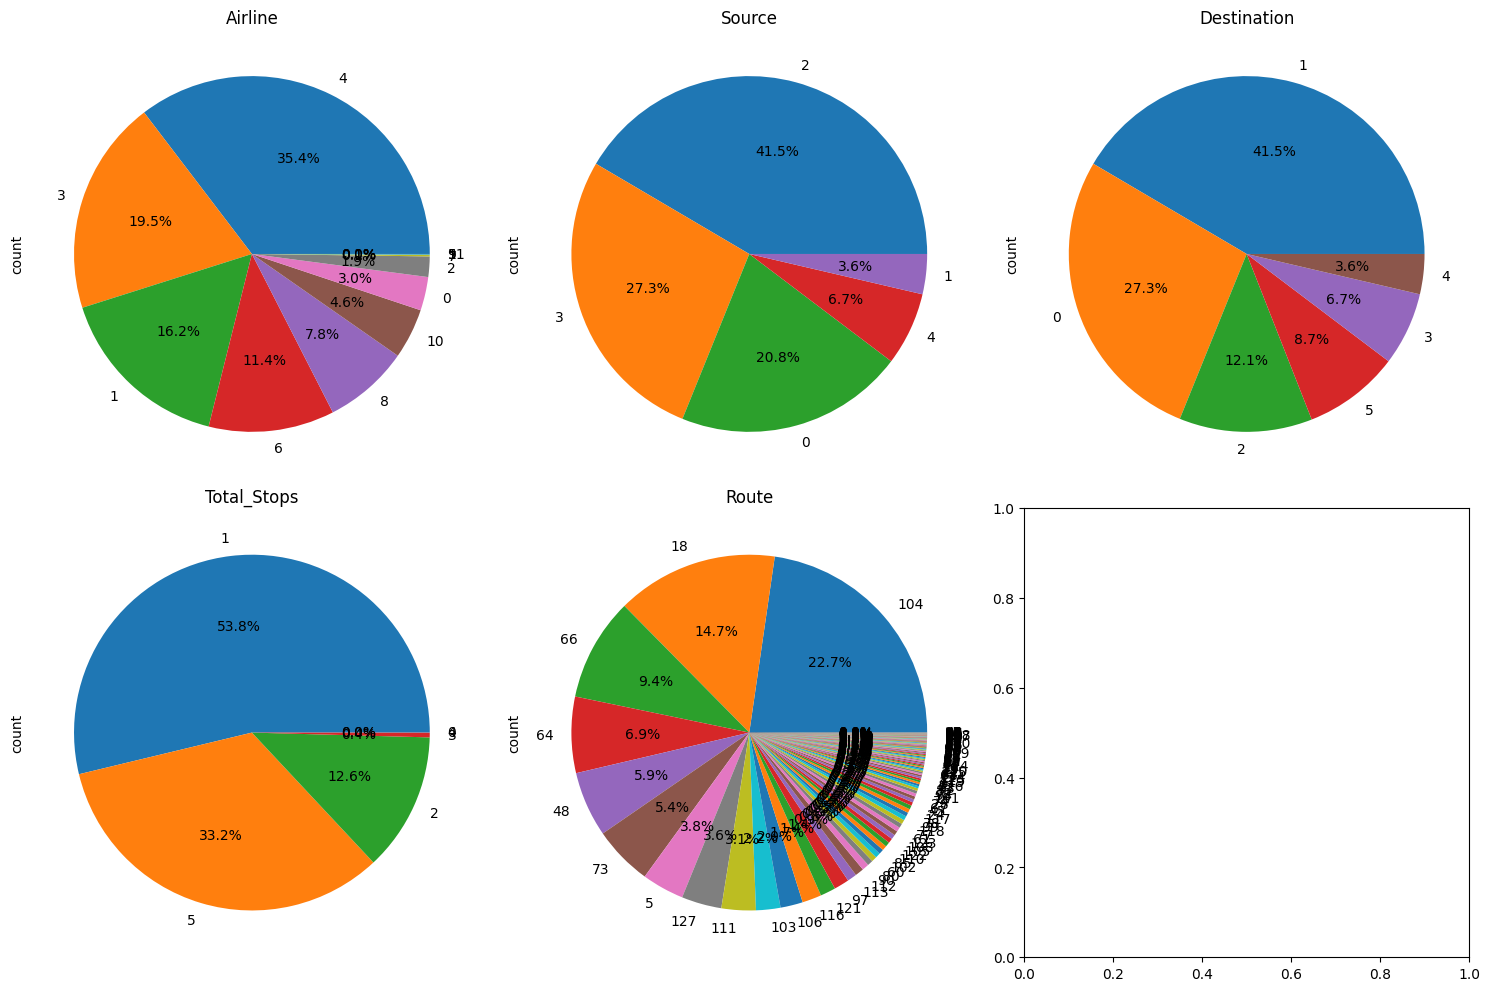

In [ ]:
import matplotlib.pyplot as plt

# Define the categorical columns
categorical_columns = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Route']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterate through the categorical columns and plot the pie charts
for i, col in enumerate(categorical_columns):
    ax = axes[i // 3, i % 3]
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
    ax.set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
dd_1=pd.read_excel("/content/drive/MyDrive/Dataset/Flight_Price_Test.xlsx")

In [ ]:
dd_1.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [ ]:
dd_1.duplicated().sum()

26

In [ ]:
dd_1.drop_duplicates(inplace=True)

In [ ]:
#label encoder to dd_1

le = LabelEncoder()

for col in ['Airline', 'Source', 'Destination', 'Total_Stops', 'Route']:
    dd_1[col] = le.fit_transform(dd_1[col])

dd_1.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,6/06/2019,2,1,76,17:30,04:25 07 Jun,10h 55m,0,No info
1,3,12/05/2019,3,0,65,06:20,10:20,4h,0,No info
2,4,21/05/2019,2,1,76,19:15,19:00 22 May,23h 45m,0,In-flight meal not included
3,6,21/05/2019,2,1,76,08:00,21:00,13h,0,No info
4,0,24/06/2019,0,2,16,23:55,02:45 25 Jun,2h 50m,4,No info


In [ ]:
df2 = dd_1[['Airline', 'Source', 'Destination', 'Total_Stops', 'Route']]


In [ ]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

y_pred_rt = model_rf.predict(df2)




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
print(y_pred_rt)

[8.55427623 8.55427623 8.55427623 ... 8.55427623 8.93596973 8.55427623]


In [ ]:
# adding y_pred_rt as a new column in dd_1

dd_1['Price_1'] = y_pred_rt
dd_1.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price_1
0,4,6/06/2019,2,1,76,17:30,04:25 07 Jun,10h 55m,0,No info,8.554276
1,3,12/05/2019,3,0,65,06:20,10:20,4h,0,No info,8.554276
2,4,21/05/2019,2,1,76,19:15,19:00 22 May,23h 45m,0,In-flight meal not included,8.554276
3,6,21/05/2019,2,1,76,08:00,21:00,13h,0,No info,8.554276
4,0,24/06/2019,0,2,16,23:55,02:45 25 Jun,2h 50m,4,No info,8.840931


In [ ]:
from sklearn.pipeline import Pipeline

# Create a pipeline for the Random Forest model
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])

# Fit the pipeline to the training data
pipeline_rf.fit(X_train, y_train)

# Predict the target values for the test data
y_pred_rf = pipeline_rf.predict(X_test)

# Calculate the R2 score for the pipeline
r2_score_rf_pipeline = r2_score(y_test, y_pred_rf)
print("R2 score for Random Forest with pipeline:", r2_score_rf_pipeline)



R2 score for Random Forest with pipeline: 0.7675421280011911
